In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.shape

(1303, 12)

In [8]:
df.duplicated().sum()

0

Their is no missing value and no duplicate value

So,don't need more pre processing

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
529,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,73366.56
260,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.8kg,60845.76
367,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,No OS,2.4kg,43103.52
656,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,48964.32
1014,HP,Notebook,13.3,1366x768,Intel Core i3 7100U 2.4GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.49kg,42624.00


Do some feature transformation :--

In [11]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [12]:
df.rename(columns={'Ram':'Ram(GB)'},inplace=True)
df.rename(columns={'Weight':'Weight(kg)'},inplace=True)

In [13]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [14]:
df['Ram(GB)']=df['Ram(GB)'].astype('int64')
df['Weight(kg)']=df['Weight(kg)'].astype('float32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram(GB)           1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight(kg)        1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int64(1), object(7)
memory usage: 107.0+ KB


EDA (Exploratory Data Analysis):--

In [16]:
df.describe()

,Inches,Ram(GB),Weight(kg),Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


Univariate Analysis

In [17]:
import warnings 
warnings.filterwarnings("ignore")

<AxesSubplot: xlabel='Price', ylabel='Density'>

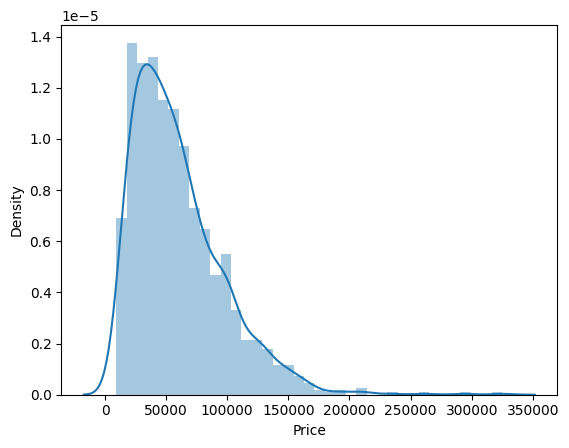

In [18]:
sns.distplot(df['Price'])

In [19]:
num = [col for col in df.columns if df[col].dtype!='O']

In [20]:
num

['Inches', 'Ram(GB)', 'Weight(kg)', 'Price']

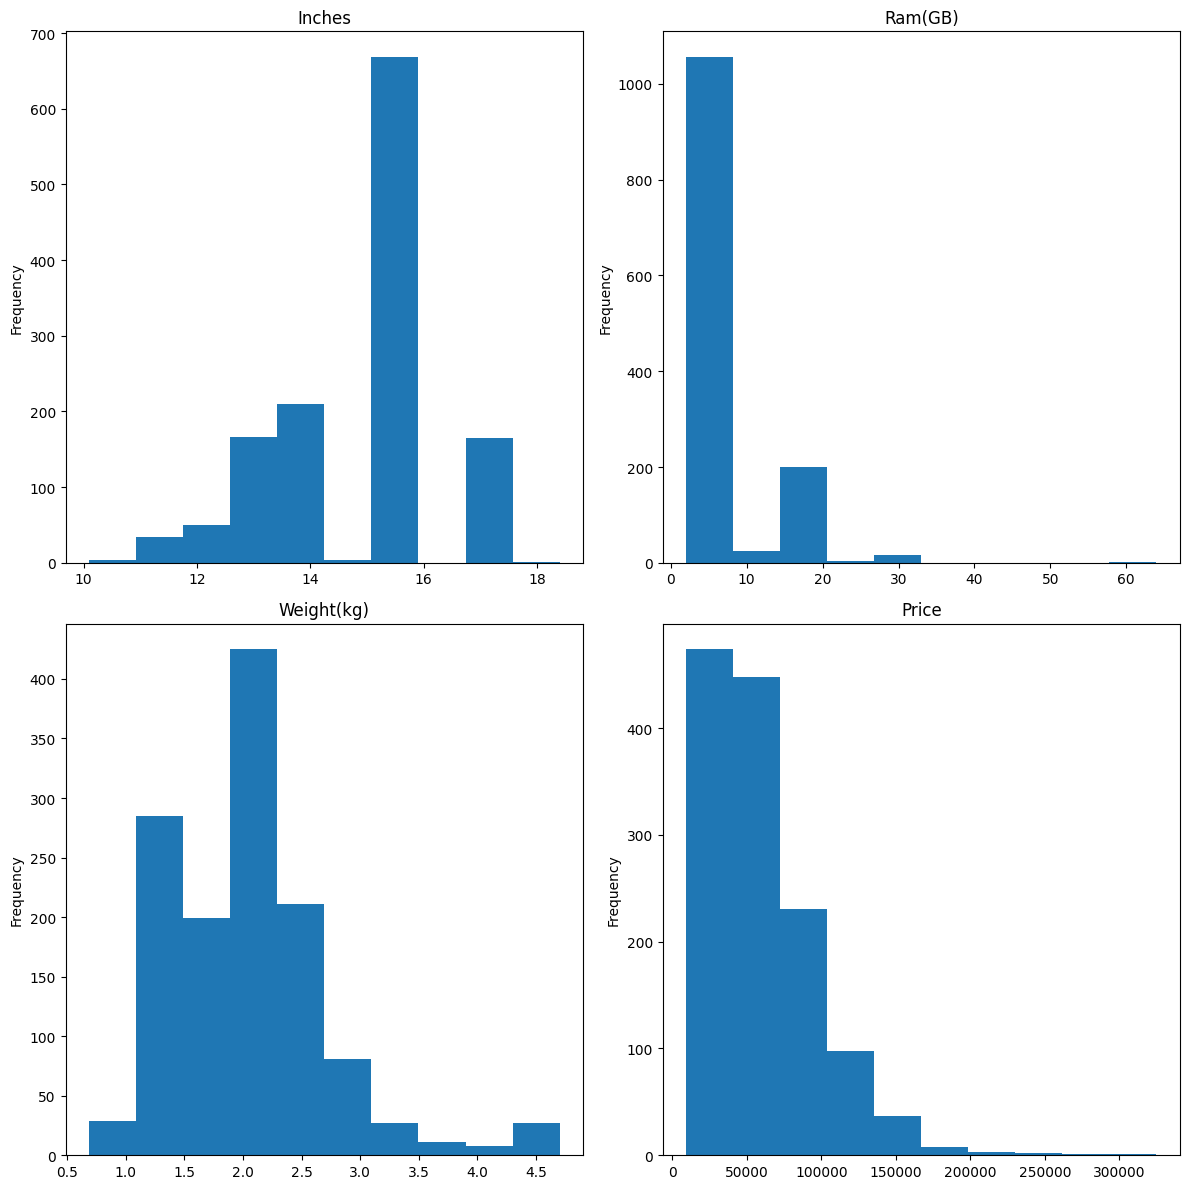

In [21]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(12,12))

# Flatten the 2D array `ax` for easy iteration
ax = ax.flatten()

# Loop through each subplot and plot the boxplot
for i, a in enumerate(ax):
    df[num[i]].plot(kind='hist',ax=a)
    a.set_title(f'{num[i]}')

plt.tight_layout()
plt.show()

<AxesSubplot: >

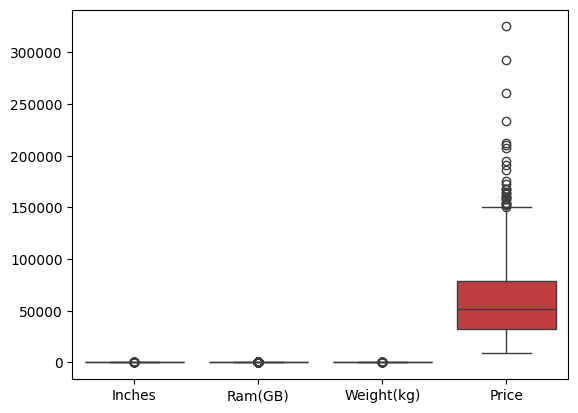

In [22]:
sns.boxplot(data=df[num])

Price has max outlier as compare to others

In [23]:
cat = [col for col in df.columns if df[col].dtype=="O"]

In [24]:
cat

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [25]:
print("Value Counts of all columns :--")
for c in cat:
    print(f"-----------{c} column -----------")
    print(df[c].value_counts()[:4])

Value Counts of all columns :--
-----------Company column -----------
Dell      297
Lenovo    297
HP        274
Asus      158
Name: Company, dtype: int64
-----------TypeName column -----------
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Name: TypeName, dtype: int64
-----------ScreenResolution column -----------
Full HD 1920x1080                            507
1366x768                                     281
IPS Panel Full HD 1920x1080                  230
IPS Panel Full HD / Touchscreen 1920x1080     53
Name: ScreenResolution, dtype: int64
-----------Cpu column -----------
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Name: Cpu, dtype: int64
-----------Memory column -----------
256GB SSD    412
1TB HDD      223
500GB HDD    132
512GB SSD    118
Name: Memory, dtype: int64
-----------Gpu column -----------
Intel HD Graphics 620      281


Based on the value counts for each column, here are some conclusions:

Company: Dell, Lenovo, and HP are the most common brands, with Dell and Lenovo each having 297 units and HP slightly fewer at 274. Asus is also present but less frequently (158 units).

TypeName: The most popular type of device is the Notebook, with 727 units. Gaming laptops follow with 205, and Ultrabooks and 2-in-1 Convertibles are also fairly common with 196 and 121 units, respectively.

ScreenResolution: Full HD (1920x1080) is the most common resolution, with 507 devices. Additionally, 1366x768 resolution is also popular (281 units). Higher quality IPS Full HD options are available in fewer units, including 230 without touchscreen support and 53 with touchscreen support.

CPU: Intel Core i5 and i7 processors dominate the dataset. Intel Core i5 7200U is the most common CPU (190 units), followed by Intel Core i7 variants (7700HQ with 146 units, 7500U with 134 units, and 8550U with 73 units).

Operating System: Windows 10 is likely the most frequent OS (in the full dataset), while No OS, Linux, and Windows 7 also appear but in smaller quantities (66, 62, and 45 units, respectively).

This dataset suggests a trend toward popular brands and models with Full HD screens and mid-to-high-end CPUs. The operating system distribution shows a preference for Windows but includes some Linux and other configurations as well.

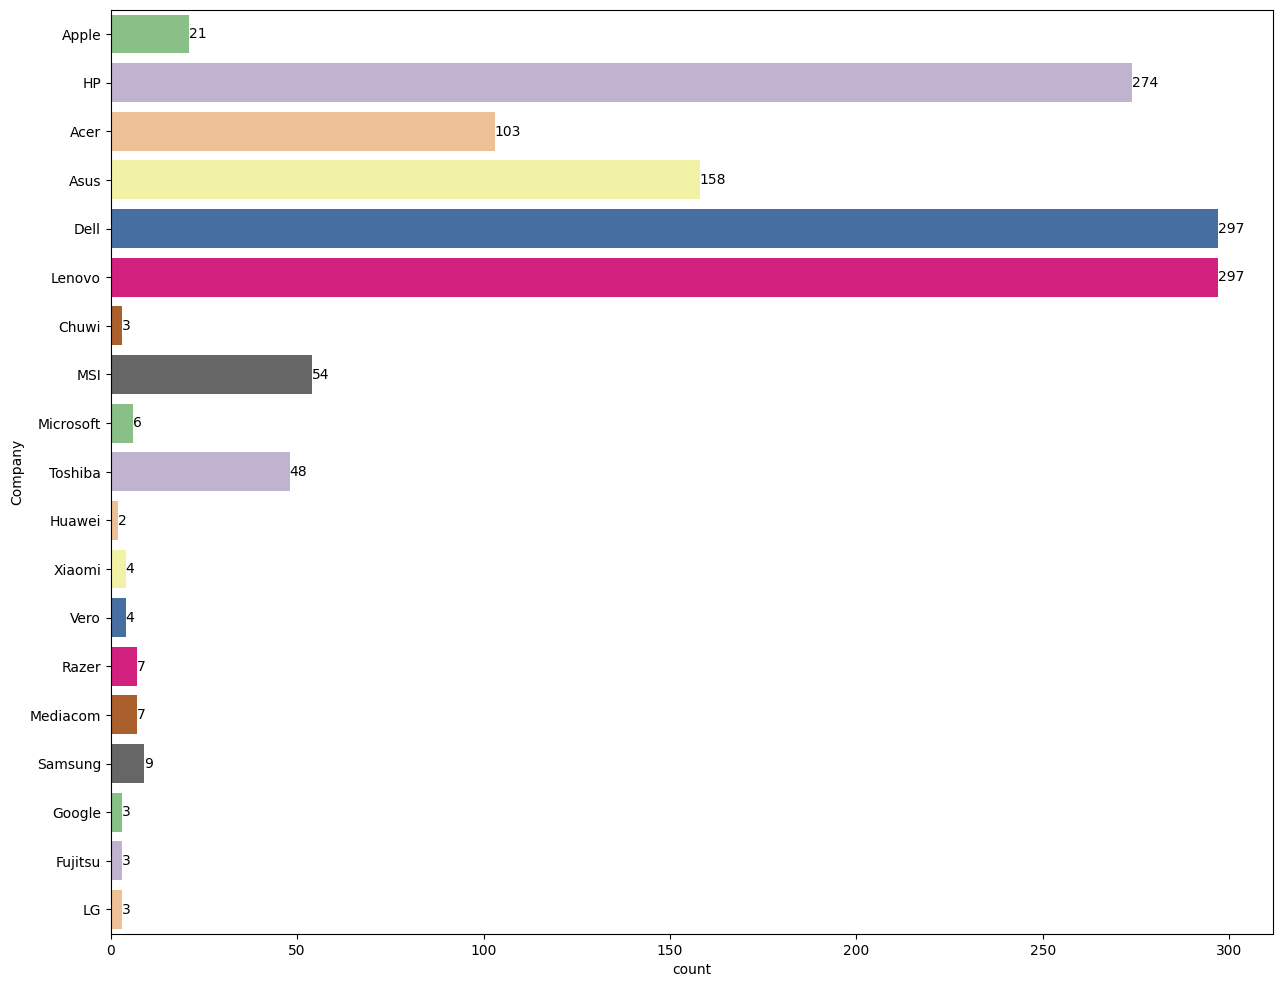

In [26]:
plt.figure(figsize=(15,12))
ax = sns.countplot(df['Company'],palette='Accent')
for container in ax.containers:
    ax.bar_label(container)
plt.show()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [27]:
cat

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [28]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [ ]:
df['TypeName'].values

array(['Ultrabook', 'Ultrabook', 'Notebook', ..., 'Notebook', 'Notebook',
       'Notebook'], dtype=object)

In [30]:
df['TypeName'].value_counts()*100/len(df)

Notebook              55.794321
Gaming                15.732924
Ultrabook             15.042210
2 in 1 Convertible     9.286262
Workstation            2.225633
Netbook                1.918649
Name: TypeName, dtype: float64

In [31]:
typ = dict(df['TypeName'].value_counts())

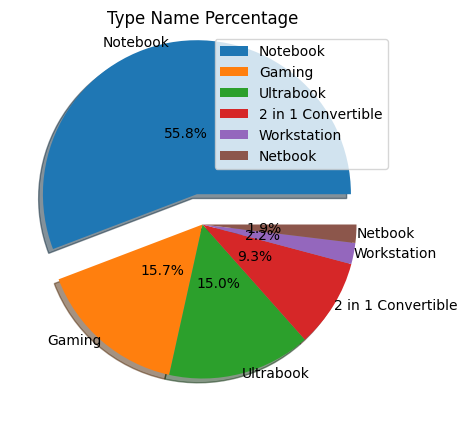

In [32]:
plt.figure(figsize=(15,5))

plt.pie(x=typ.values(),labels=typ.keys(),labeldistance=1,pctdistance=0.4
        ,autopct="%1.1f%%",explode=[0.2,0,0,0,0,0],shadow=True)
plt.title('Type Name Percentage')
plt.legend()
plt.show()

-------------------------OR---------------------------

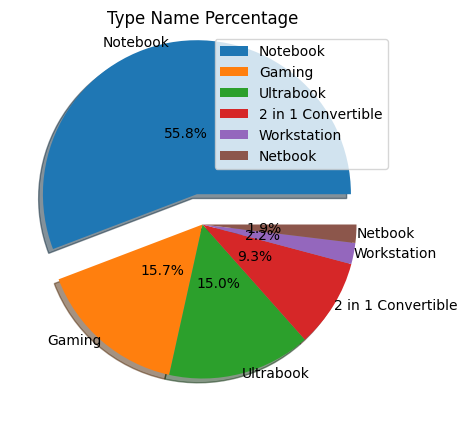

In [33]:
plt.figure(figsize=(15,5))

plt.pie(x=df['TypeName'].value_counts().values,labels=df['TypeName'].value_counts().index,labeldistance=1,pctdistance=0.4
        ,autopct="%1.1f%%",explode=[0.2,0,0,0,0,0],shadow=True)
plt.title('Type Name Percentage')
plt.legend()
plt.show()

In [34]:
cat

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [35]:
df[cat].describe()

,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys
count,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,39,110,9
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows 10
freq,297,727,507,190,412,281,1072


Conclusion:

The analysis reveals significant insights into the factors influencing laptop prices. Specifications such as processor type, RAM size, GPU performance, and storage capacity are critical determinants of a laptop’s price. Higher-end components, such as advanced processors (e.g., Intel Core i7 and i9), larger RAM (16GB or more), and dedicated GPUs, tend to increase prices considerably. Moreover, brand reputation also plays a role, with certain brands commanding premium prices for similar specifications.

The regression model developed in this analysis demonstrates good predictive capability, confirming the importance of each feature in price prediction. These findings are valuable for consumers seeking optimal configurations within budget constraints and for manufacturers aiming to price their products competitively. Future work could involve adding new features or exploring different machine learning models to improve accuracy.

Bivariate Analysis:--


In [36]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram(GB)',
       'Memory', 'Gpu', 'OpSys', 'Weight(kg)', 'Price'],
      dtype='object')

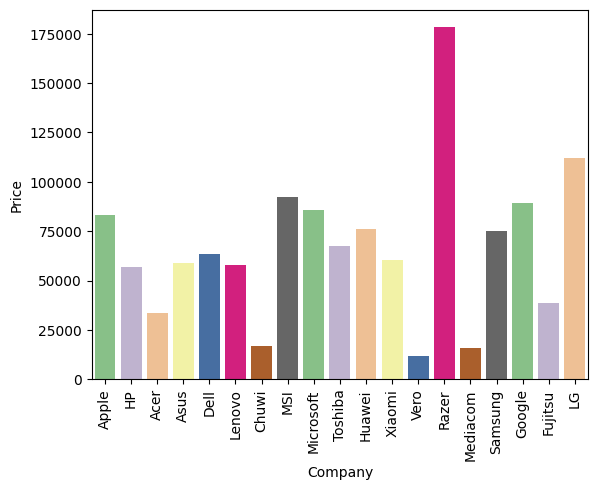

In [37]:
sns.barplot(x=df['Company'],y=df['Price'],palette='Accent'
            ,hue_order=df['Company'],errorbar=("ci",0))
plt.xticks(rotation='vertical')
plt.show()

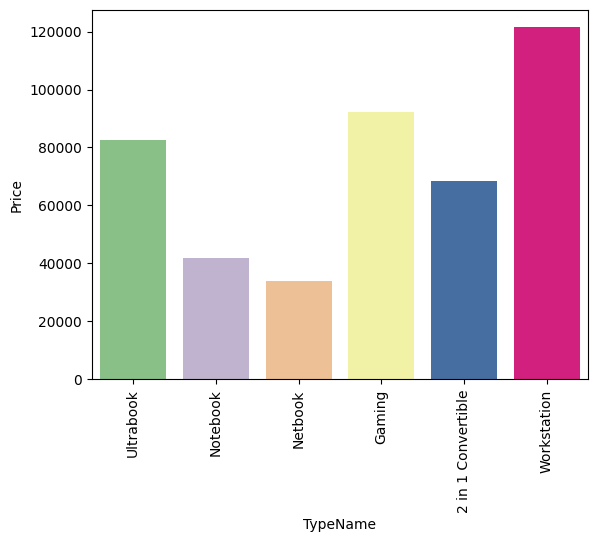

In [38]:
sns.barplot(x=df['TypeName'],y=df['Price'],palette='Accent'
            ,hue_order=df['Company'],errorbar=("ci",0))
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: xlabel='Inches', ylabel='Price'>

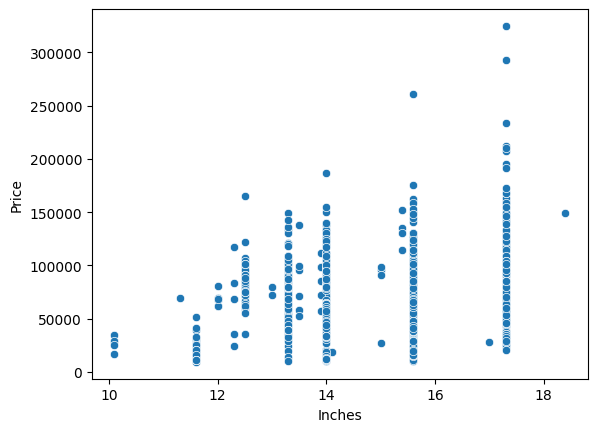

In [39]:

sns.scatterplot(x=df['Inches'],y=df['Price'])

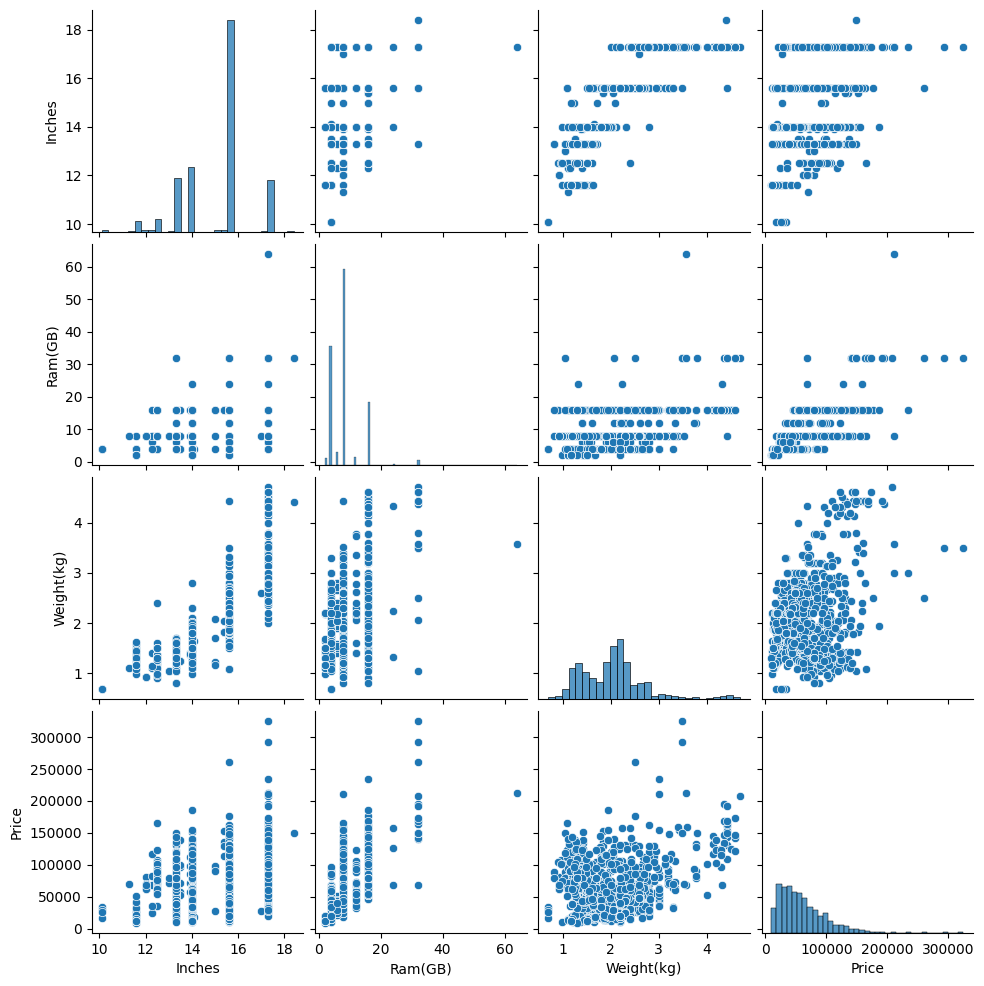

In [40]:
sns.pairplot(df,palette='Accent')
plt.show()

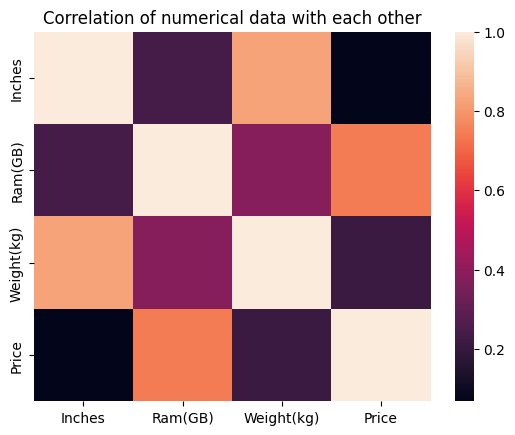

In [41]:
sns.heatmap(df[num].corr())
plt.title('Correlation of numerical data with each other')
plt.show()

In [42]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [43]:
df['Touch Screen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [44]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,Touch Screen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [45]:
df['Touch Screen'].value_counts()

0    1111
1     192
Name: Touch Screen, dtype: int64

In [46]:
df['Touch Screen'].astype('str')

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Touch Screen, Length: 1303, dtype: object

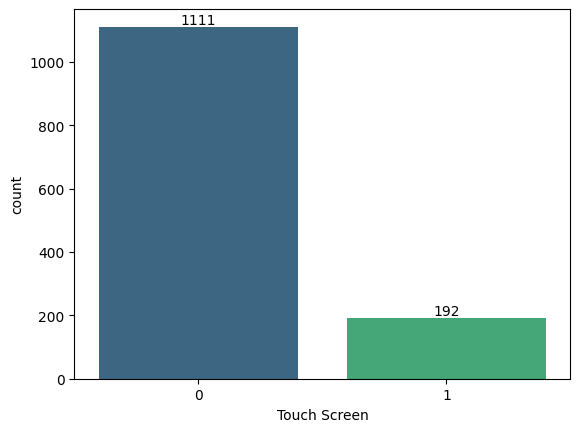

In [47]:
ax = sns.countplot(x=df['Touch Screen'],palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<AxesSubplot: xlabel='Touch Screen', ylabel='Price'>

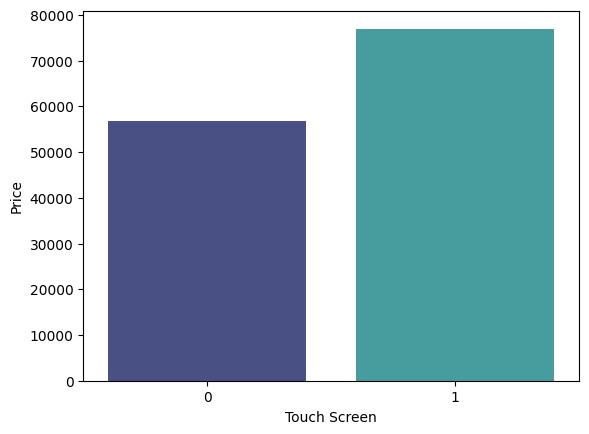

In [48]:
sns.barplot(x=df['Touch Screen'],y=df['Price'],palette='mako',errorbar=("ci",0))

In [49]:

df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<AxesSubplot: xlabel='Ips', ylabel='count'>

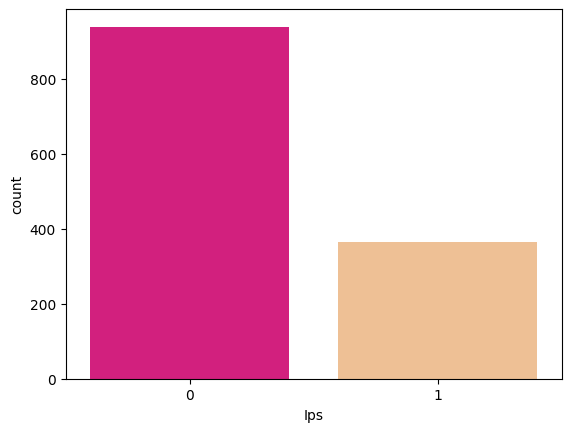

In [50]:
sns.countplot(x=df['Ips'],palette='Accent_r')

<AxesSubplot: xlabel='Ips', ylabel='Price'>

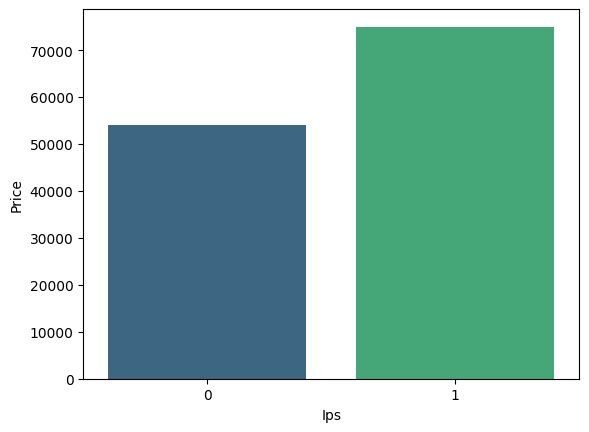

In [51]:
sns.barplot(x=df['Ips'],y=df['Price'],palette='viridis',errorbar=('ci',0))

In [52]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [53]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [54]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,Touch Screen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [55]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [56]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,Touch Screen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [57]:
df['X_res']=df['X_res'].astype('int64')
df['Y_res']=df['Y_res'].astype('int64')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram(GB)           1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight(kg)        1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touch Screen      1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int64(5), object(7)
memory usage: 147.7+ KB


In [59]:
df.corr()['Price']

Inches          0.068197
Ram(GB)         0.743007
Weight(kg)      0.210370
Price           1.000000
Touch Screen    0.191226
Ips             0.252208
X_res           0.556529
Y_res           0.552809
Name: Price, dtype: float64

Make new column ppi with use of inches ,x_resand y_res

In [60]:
df['ppi'] = (((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [61]:
df.corr()['Price']

Inches          0.068197
Ram(GB)         0.743007
Weight(kg)      0.210370
Price           1.000000
Touch Screen    0.191226
Ips             0.252208
X_res           0.556529
Y_res           0.552809
ppi             0.473487
Name: Price, dtype: float64

All info get from screen resolution so we drop it

In [62]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [63]:
df.head()

,Company,TypeName,Inches,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,Touch Screen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


Also we dont need X_res,Y_resand inches because we make ppi column

In [64]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [65]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [66]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [67]:
df.head()

,Company,TypeName,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [68]:
df['Cpu Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [69]:
def fetch_processor(text):
    if 'Intel Core i7' == text or 'Intel Core i5'==text or 'Intel Core i3'==text:
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Intel'
        else:
            return 'AMD Processor'

In [70]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [71]:
df.head()

,Company,TypeName,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot: >

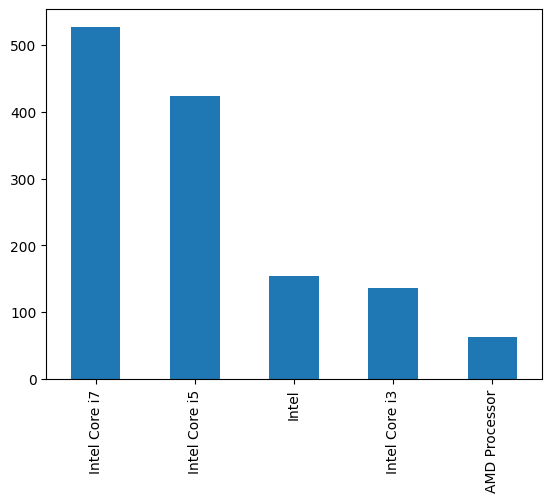

In [72]:
df['Cpu Brand'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Cpu Brand', ylabel='Price'>

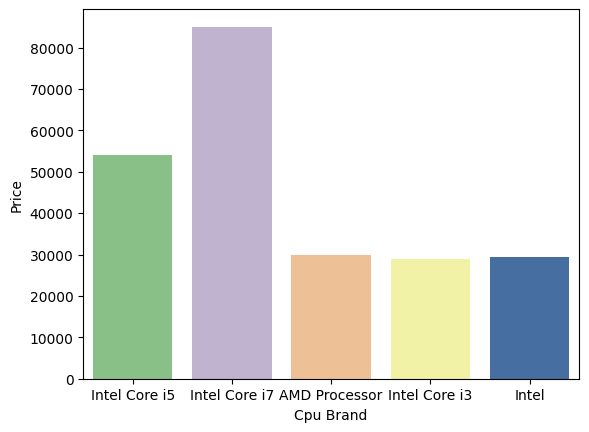

In [73]:
sns.barplot(x=df['Cpu Brand'],y=df['Price'],palette='Accent',errorbar=('ci',0))

<AxesSubplot: >

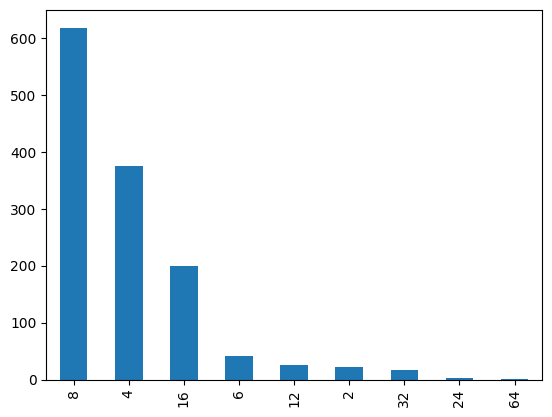

In [74]:
df['Ram(GB)'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Ram(GB)', ylabel='Price'>

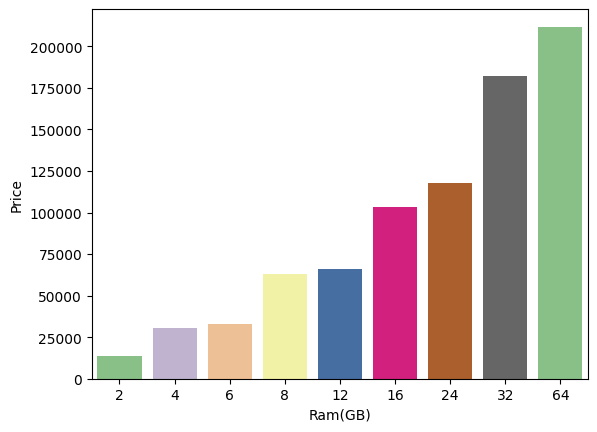

In [75]:
sns.barplot(x=df['Ram(GB)'],y=df['Price'],palette='Accent',errorbar=('ci',0))


In [76]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [77]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [78]:
df.head()

,Company,TypeName,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0


Now,Memory also featured 

so,also drop this

In [79]:
df.drop(columns=['Memory'],inplace=True)

In [80]:
df.corr()['Price']

Ram(GB)          0.743007
Weight(kg)       0.210370
Price            1.000000
Touch Screen     0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [81]:

df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [82]:
df.sample()

,Company,TypeName,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD
497,HP,Notebook,Intel Core i7 7600U 2.8GHz,8,Intel HD Graphics 620,Windows 10,1.48,93186.72,0,0,157.350512,Intel Core i7,Intel Core i7,0,1000


In [83]:
df.drop(columns=['Cpu'],inplace=True)

In [84]:
df.sample()

,Company,TypeName,Ram(GB),Gpu,OpSys,Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD
958,Dell,Ultrabook,8,Intel HD Graphics 520,Windows 10,1.3,67559.04,0,0,276.05353,Intel Core i7,Intel Core i7,0,256


In [85]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [86]:
lst_gpu = []
for gpu in df['Gpu'].unique():
    lst_gpu.append(gpu.split()[0])

In [87]:
pd.DataFrame(lst_gpu)[0].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

these are brand of GPU

['Intel', 'AMD', 'Nvidia', 'ARM']

In [88]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [89]:
df.sample(5)

,Company,TypeName,Ram(GB),Gpu,OpSys,Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand
1291,Acer,Notebook,4,Intel HD Graphics 400,Linux,2.40,15397.92,0,0,100.454670,Intel Celeron Dual,Intel,500,0,Intel
31,Asus,Notebook,2,AMD Radeon R2,Windows 10,1.65,10602.72,0,0,111.935204,AMD E-Series E2-6110,AMD Processor,0,0,AMD
69,Asus,Gaming,12,Nvidia GeForce GTX 1050 Ti,Linux,3.00,50562.72,0,0,127.335675,Intel Core i7,Intel Core i7,1000,0,Nvidia
633,Lenovo,Notebook,4,Nvidia GeForce 920MX,Windows 10,2.20,30849.12,0,0,141.211998,Intel Core i3,Intel Core i3,1000,0,Nvidia
783,Lenovo,Notebook,8,Intel HD Graphics 405,No OS,2.20,17529.12,0,0,100.454670,Intel Celeron Quad,Intel,1000,0,Intel


In [90]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

As we see that their 1 brand of ARM so we this skip brand for analysis

In [91]:
df = df[df['Gpu Brand']!='ARM']

In [92]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

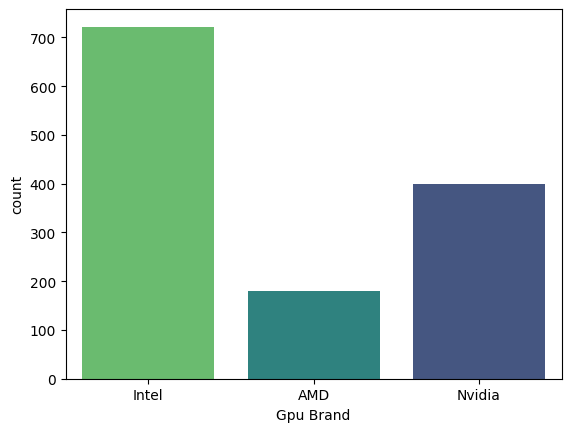

In [93]:
sns.countplot(x=df['Gpu Brand'],palette='viridis_r')

plt.show()

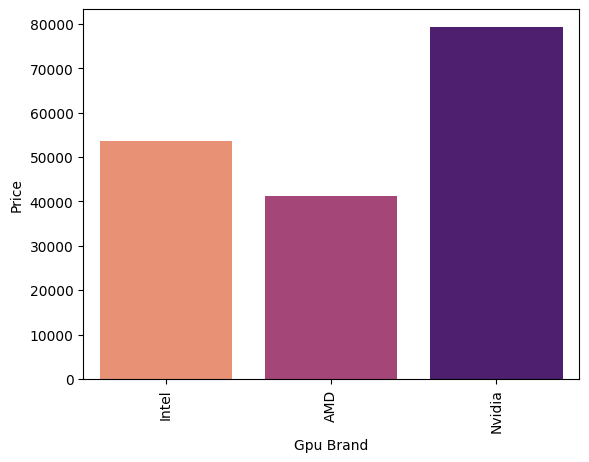

In [94]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'],errorbar=('ci',0),palette='magma_r')
plt.xticks(rotation='vertical')
plt.show()

In [95]:
counts_df = df.groupby(['Company', 'Gpu Brand']).size().unstack(fill_value=0)


In [96]:
counts_df

Gpu Brand,AMD,Intel,Nvidia
Company,,,
Acer,10,58,35
Apple,3,18,0
Asus,11,65,82
Chuwi,0,3,0
Dell,77,144,76
Fujitsu,0,3,0
Google,0,3,0
HP,47,175,52
Huawei,0,2,0


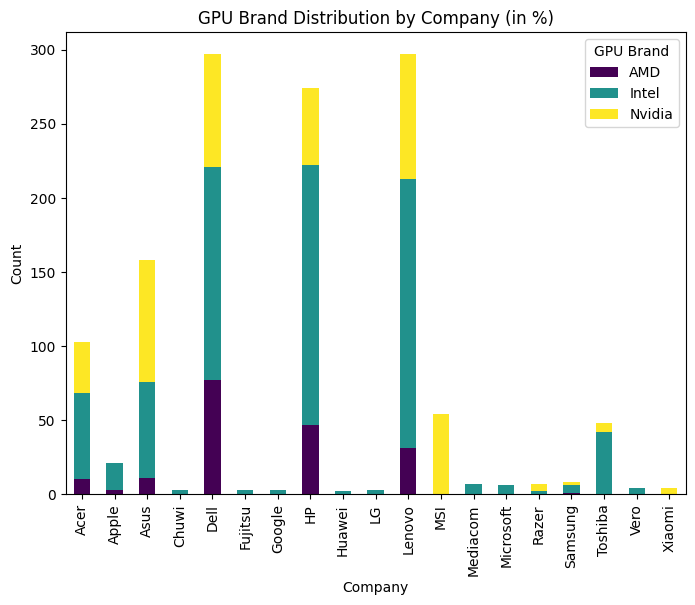

In [97]:
counts_df.plot(kind='bar',stacked=True, colormap='viridis', figsize=(8, 6))
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('GPU Brand Distribution by Company (in %)')
plt.legend(title='GPU Brand')
plt.show()

In [98]:
df.drop(columns=['Gpu'],inplace=True)

In [99]:
df.sample()

,Company,TypeName,Ram(GB),OpSys,Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand
657,Dell,Notebook,16,Windows 10,2.2,60472.8,0,0,141.211998,Intel Core i7,Intel Core i7,2000,256,AMD


In [100]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

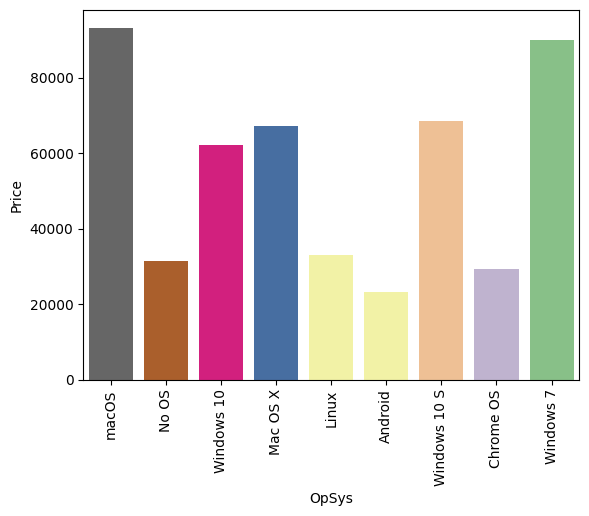

In [101]:

sns.barplot(x=df['OpSys'],y=df['Price'],errorbar=('ci',0),palette='Accent_r')
plt.xticks(rotation='vertical')
plt.show()

In [102]:

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [103]:
df['os']=df['OpSys'].apply(cat_os)

In [104]:
df.sample(10)

,Company,TypeName,Ram(GB),OpSys,Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
303,Lenovo,Notebook,8,No OS,2.20,29250.7200,0,0,100.454670,Intel Core i5,Intel Core i5,2000,0,Nvidia,Others/No OS/Linux
120,Acer,Notebook,6,Windows 10,2.10,25521.1200,1,1,141.211998,Intel Core i3,Intel Core i3,1000,0,Intel,Windows
11,HP,Notebook,4,No OS,1.86,18381.0672,0,0,141.211998,Intel Core i3,Intel Core i3,500,0,Intel,Others/No OS/Linux
323,HP,Notebook,8,Windows 10,2.10,48058.5600,0,1,100.454670,Intel Core i7,Intel Core i7,1000,0,Intel,Windows
1028,Dell,Ultrabook,8,Windows 10,1.29,86526.7200,1,0,276.053530,Intel Core i5,Intel Core i5,0,256,Intel,Windows
1205,Dell,Notebook,8,Windows 10,2.36,47365.9200,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,AMD,Windows
94,Asus,Ultrabook,8,Windows 10,1.25,55890.7200,0,0,157.350512,Intel Core i7,Intel Core i7,0,256,Intel,Windows
979,Asus,Gaming,16,Windows 10,2.99,93186.7200,0,0,127.335675,Intel Core i7,Intel Core i7,1000,256,Nvidia,Windows
659,Dell,Gaming,32,Windows 10,4.42,167691.8736,0,1,254.671349,Intel Core i7,Intel Core i7,1000,512,Nvidia,Windows
1226,Dell,Ultrabook,8,Windows 10,1.29,78694.5600,1,0,276.053530,Intel Core i7,Intel Core i7,0,256,Intel,Windows


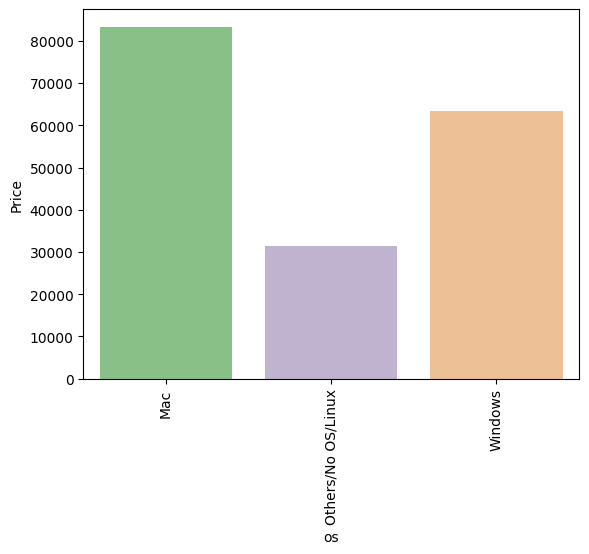

In [105]:
sns.barplot(x=df['os'],y=df['Price'],errorbar=('ci',0),palette='Accent')
plt.xticks(rotation='vertical')
plt.show()

In [106]:
df.drop(columns=['OpSys'],inplace=True)

In [107]:
df.sample()

,Company,TypeName,Ram(GB),Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
1075,Lenovo,Notebook,8,3.0,35111.52,0,0,106.113062,Intel Core i5,Intel Core i5,1000,0,AMD,Windows


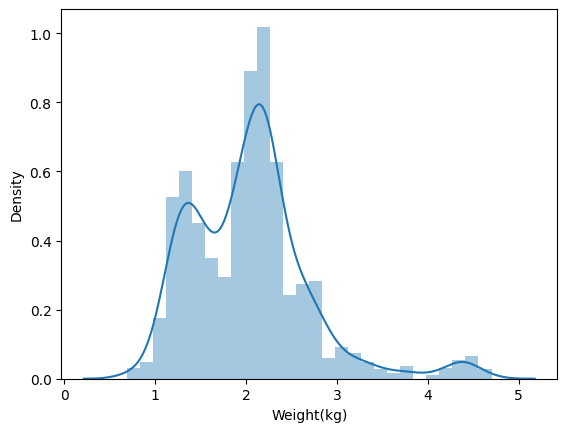

In [108]:
sns.distplot(df['Weight(kg)'])
plt.show()


<AxesSubplot: >

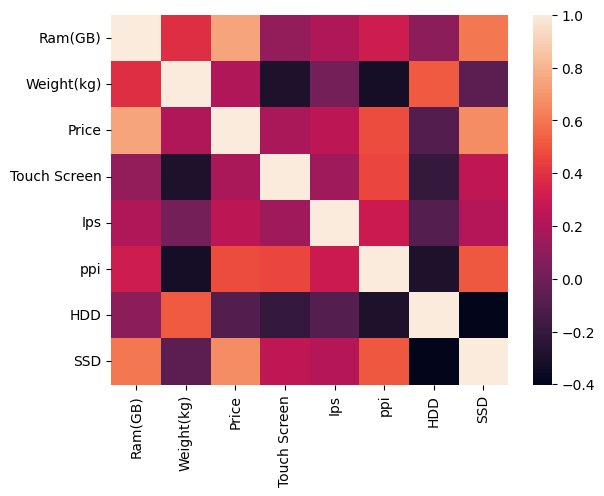

In [109]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='Weight(kg)', ylabel='Price'>

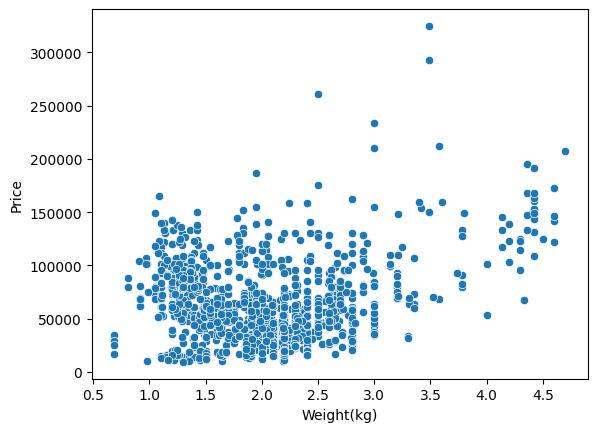

In [110]:
sns.scatterplot(x=df['Weight(kg)'],y=df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

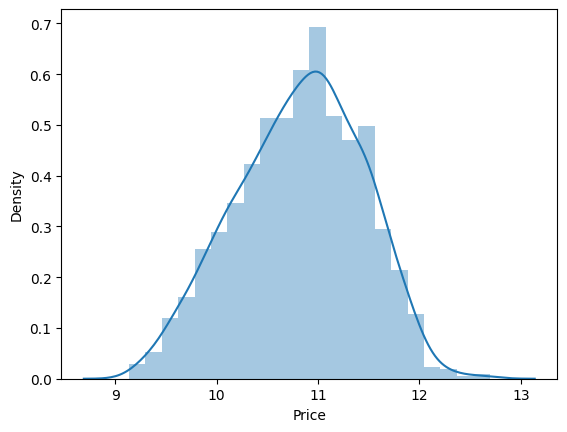

In [111]:
sns.distplot(np.log(df['Price']))

In [112]:
X = df.drop(columns=['Price'])
Y= np.log(df['Price'])

In [113]:
X.head()

,Company,TypeName,Ram(GB),Weight(kg),Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,Intel,Mac


In [114]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [115]:
X_train

,Company,TypeName,Ram(GB),Weight(kg),Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Intel Celeron Dual,Intel,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD A10-Series 9620P,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [117]:
pip install xgboost

     -------------------------------------- 124.9/124.9 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [130]:
X_train

,Company,TypeName,Ram(GB),Weight(kg),Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Intel Celeron Dual,Intel,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD A10-Series 9620P,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


Linear Regression 


In [136]:
from sklearn.compose import make_column_selector as selector


step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', LinearRegression())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))


R2 score :- 0.8490987510816798
MAE :- 0.19233678152558326


In [128]:
df.sample()

,Company,TypeName,Ram(GB),Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
265,Dell,2 in 1 Convertible,8,2.67,42570.72,1,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Windows


In [139]:
np.exp(.19)

1.2092495976572515

Ridge Regression 

In [140]:

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', Ridge(alpha=10))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))


R2 score :- 0.8405169503091894
MAE :- 0.19755820412529235


Lasso Regression

In [141]:

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', Lasso(alpha=0.001))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))


R2 score :- 0.8379802676727874
MAE :- 0.19937399258526922


KNN

In [142]:

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', KNeighborsRegressor(n_neighbors=3))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))


R2 score :- 0.7952576834739206
MAE :- 0.19583899037634445


Decision Tree

In [143]:

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', DecisionTreeRegressor(max_depth=8))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))


R2 score :- 0.8429133685433843
MAE :- 0.18098326316601404


SVR

In [144]:

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', SVR(kernel='rbf',C=10000,epsilon=0.1))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))


R2 score :- 0.8220909939217578
MAE :- 0.1957471973489941


Random Forset

In [145]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', RandomForestRegressor(n_estimators=100,
                                random_state=3,
                                max_samples=0.5,
                                max_features=0.75,
                                max_depth=15))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))

R2 score :- 0.891302243689076
MAE :- 0.15631942947939578


Extra Trees

In [147]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', ExtraTreesRegressor(n_estimators=100,
                                random_state=3,
                                max_samples=0.5,
                                bootstrap=True,
                                max_features=0.75,
                                max_depth=15))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))

R2 score :- 0.8926164774736187
MAE :- 0.156882602467274


AdaBoost

In [148]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', AdaBoostRegressor(n_estimators=15,learning_rate=1.0))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))

R2 score :- 0.7936713952426224
MAE :- 0.23082840107224167


Gradient Boost

In [149]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2',GradientBoostingRegressor(n_estimators=500))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))

R2 score :- 0.8907608266038777
MAE :- 0.1538880094097368


XgBoost

In [150]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('step1', step1),
    ('step2',XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))

R2 score :- 0.8835774854202676
MAE :- 0.15638150554884597


Voting Regressor

In [151]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,
                                random_state=3,
                                max_samples=0.5,
                                bootstrap=True,
                                max_features=0.75,
                                max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2',XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score :-', r2_score(y_test, y_pred))
print('MAE :-', mean_absolute_error(y_test, y_pred))

R2 score :- 0.8835774854202676
MAE :- 0.15638150554884597


Stacking

In [153]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), selector(dtype_include="object"))
    ],
    remainder='passthrough'
)
estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8817170836941354
MAE 0.1656363715691934


Exporting the Model

In [154]:
import joblib

joblib.dump(df, 'df.joblib')
joblib.dump(pipe, 'pipe.joblib')

In [155]:
df

,Company,TypeName,Ram(GB),Weight(kg),Price,Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,Intel,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,Intel Core i7,1000,0,AMD,Windows


In [156]:
X_train

,Company,TypeName,Ram(GB),Weight(kg),Touch Screen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Intel Celeron Dual,Intel,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD A10-Series 9620P,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [157]:
df.columns

Index(['Company', 'TypeName', 'Ram(GB)', 'Weight(kg)', 'Price', 'Touch Screen',
       'Ips', 'ppi', 'Cpu Name', 'Cpu Brand', 'HDD', 'SSD', 'Gpu Brand', 'os'],
      dtype='object')